## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
awesome.gif
data.db
im
im.db
im.db.zip
im_db.zip
im_db_folder
movie_data_erd.jpeg
student.ipynb
zippedData


In [2]:
#changing directories to access the unzipped SQL database
%cd im_db_folder

C:\Users\joelm\Desktop\Flatiron School\Phase 1\Phase 1 Project\dsc-phase-1-project-v2-4\dsc-phase-1-project-v2-4\im_db_folder


In [3]:
!ls

ROI_csv.csv
bom.movie_gross.csv.gz
df_csv_budgets.csv
im.db
tn.movie_budgets.csv.gz


In [4]:
import sqlite3
import pandas as pd

In [5]:
conn = sqlite3.connect("im.db")
print(conn)

In [6]:
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,budget_and_gross
9,ROI


In [7]:
pd.read_sql("""SELECT * FROM movie_basics;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
#Since my proposal focuses on return on investment, I'll use this budgets CSV, 
# which also shows worldwide gross:
df_csv_budgets = pd.read_csv('tn.movie_budgets.csv.gz', encoding='latin-1')
df_csv_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
#Gathering some basic info on this file:
df_csv_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
df_csv_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [11]:
#I need integers, not strings, so I Googled how to get rid of those dollar signs and then convert
# the columns into integers:
df_csv_budgets['production_budget'] = df_csv_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_csv_budgets['domestic_gross'] = df_csv_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df_csv_budgets['worldwide_gross'] = df_csv_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
#Adding an ROI column that subtracts a film's budget from its worldwide gross:
df_csv_budgets['ROI'] = df_csv_budgets['worldwide_gross'] - df_csv_budgets['production_budget']
#Changing 'movie' column name to 'title' to match the movie info dataframe from SQL below 
# ('title' is the better name, anyway):
df_csv_budgets.rename(columns = {'movie': 'title'}, inplace = True)
df_csv_budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.344950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03


In [13]:
#Let's see if I can clean up the finance columns:
df_csv_budgets['production_budget'] = df_csv_budgets['production_budget'].astype(int)
df_csv_budgets['domestic_gross'] = df_csv_budgets['domestic_gross'].astype(int)
df_csv_budgets['worldwide_gross'] = df_csv_budgets['worldwide_gross'].astype(int)

In [14]:
#Getting rid of scientific notation in the ROI column:
pd.options.display.float_format = '{:.0f}'.format
print(df_csv_budgets['title'].head(100).to_string())

0                                                Avatar
1           Pirates of the Caribbean: On Stranger Tides
2                                          Dark Phoenix
3                               Avengers: Age of Ultron
4                     Star Wars Ep. VIII: The Last Jedi
5                  Star Wars Ep. VII: The Force Awakens
6                                Avengers: Infinity War
7         Pirates of the Caribbean: At WorldÃ¢ÂÂs End
8                                        Justice League
9                                               Spectre
10                                The Dark Knight Rises
11                              Solo: A Star Wars Story
12                                      The Lone Ranger
13                                          John Carter
14                                              Tangled
15                                         Spider-Man 3
16                           Captain America: Civil War
17                   Batman v Superman: Dawn of 

In [15]:
#It looks like this weird â figure is popping up instead of an apostrophe, so I'll replace it:

#df_csv_budgets.replace("â", "'", regex=True)
#df_csv_budgets['movie'].str.encode('ascii', 'ignore').str.decode('ascii')
#df_csv_budgets['movie'].str.replace("â□□", "'", regex=True)
#df_csv_budgets['movie'].apply(lambda x: x.replace("â□□", "'"))
#df_csv_budgets['movie'].apply(lambda x: x.replace("â��", "'"))
#df_csv_budgets['movie'].apply(lambda x: x.replace("Ã¢Â□Â□", "'"))

#Wow, this is not working and I've spent a while on it. It looks like 1.7% of titles
# are effected by this special character issue (100 rows out of 5,782 total), so dropping them in the 
# interest of time is probably the way to go.

In [16]:
#df_csv_budgets = df_csv_budgets.drop([7, 27, 91, 167, 175, 197, 262, 279, 309, 311, 329, 405, 501, 579, 627,\
#                                     1044, 1087, 1128, 1339, 1348, 1367, 1368, 1371, 1380, 1455, 1529,\
#                                     1537, 1702, 1823, 1829, 1864, 1935, 2118, 2130, 2168, 2185, 2225, 2226,\
#                                     2323, 2369, 2395, 2398, 2450, 2453, 2508, 2516, 2530, 2606, 2676, 2694,\
#                                     2701, 2719, 2737, 2756, 2761, 2868, 2928, 2949, 2984, 2996, 3013, 3139,\
#                                     3300, 3463, 3530, 3538, 3562, 3566, 3661, 3911, 4076, 4081, 4129, 4156,\
#                                     4172, 4226, 4238, 4267, 4284, 4304, 4307, 4319, 4331, 4335, 4401, 4586,\
#                                     4660, 4695, 4708, 4756, 4812, 4855, 4987, 5033, 5295, 5367, 5409, 5659,\
#                                     5707], axis=0)

In [17]:
#Now that the budget/ROI CSV has been cleaned up, let's combine everything I want from
# the SQL database and turn that into a DataFrame as well.
movie_info_df = pd.read_sql("""
SELECT
    movie_basics.movie_id,
    movie_basics.primary_title AS title,
    movie_basics.genres,
    persons.primary_name AS director
FROM movie_basics
JOIN directors
    USING(movie_id)
JOIN persons
    USING(person_id)
GROUP BY movie_basics.primary_title;
""", conn)

movie_info_df.head()
#Wow, that's a lot of stuff, it takes a few minutes for this query to run. I hope I can 
# narrow it down when I combine it with the budget df, but for now, one other thing
# I have to do is get writer and director names to actually show up in here. 

#Okay, revised it and now this SQL query is just showing director names. I could just stick with 
# director names to keep it simple. Maybe have three recommendations based on, say, the three
# ROI-friendly genres to make, which directors to hire based on those genres, and when to release it. 
# Ah, or I could make a seperate df for writers and bring that in, although...I still need to reconcile 
# these potentially multiple queries with my budget CSV. That might not be too hard, though. Ok, 
# let's drop ratings and writers. 

,movie_id,title,genres,director
0,tt1699720,!Women Art Revolution,Documentary,Lynn Hershman-Leeson
1,tt2346170,#1 Serial Killer,Horror,Stanley Yung
2,tt3120962,#5,"Biography,Comedy,Fantasy",Ricky Bardy
3,tt4470336,#50Fathers,Comedy,Joddy Eric Matthews
4,tt5255986,#66,Action,Asun Mawardi


In [18]:
df = df_csv_budgets.merge(movie_info_df, on='title', how='left')
df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,ROI,movie_id,genres,director
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,2351345279,tt1775309,Horror,Atsushi Wada
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,"Action,Adventure,Fantasy",Rob Marshall
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,"Action,Adventure,Sci-Fi",Simon Kinberg
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,"Action,Adventure,Sci-Fi",Joss Whedon
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,tt7837402,"Horror,Sci-Fi,Thriller",Robert Rodriguez
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,tt2107644,"Drama,Horror,Thriller",Benjamin Roberds


In [19]:
df = df.drop(['id', 'domestic_gross','worldwide_gross', 'movie_id'], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   title              5782 non-null   object 
 2   production_budget  5782 non-null   int32  
 3   ROI                5782 non-null   float64
 4   genres             2350 non-null   object 
 5   director           2362 non-null   object 
dtypes: float64(1), int32(1), object(4)
memory usage: 293.6+ KB


In [21]:
print(df.head(100).to_string())

    release_date                                                           title  production_budget        ROI                      genres             director
0   Dec 18, 2009                                                          Avatar          425000000 2351345279                      Horror         Atsushi Wada
1   May 20, 2011                     Pirates of the Caribbean: On Stranger Tides          410600000  635063875    Action,Adventure,Fantasy         Rob Marshall
2    Jun 7, 2019                                                    Dark Phoenix          350000000 -200237650     Action,Adventure,Sci-Fi        Simon Kinberg
3    May 1, 2015                                         Avengers: Age of Ultron          330600000 1072413963     Action,Adventure,Sci-Fi          Joss Whedon
4   Dec 15, 2017                               Star Wars Ep. VIII: The Last Jedi          317000000  999721747                         NaN                  NaN
5   Dec 18, 2015                        

In [22]:
#Ok, over half of the movies in the merged df are missing the IMDb df info. I'm guessing it has
# to do with title spelling discrepancies. I see the first movie with these missing 
# values is "Star Wars Ep. VIII: The Last Jedi," which is followed by another Star Wars
# movie. With all the different Star Wars movies and episodes, and "sidequels," maybe
# there's a common spelling mismtach going on. So, below, I search the IMDb df for any
# records where the string "Star Wars" appears in order to see title spelling differences.

movie_info_df[movie_info_df["title"].str.contains("Star Wars")]

#Yep, in the merged df it's "Star Wars Ep." plus a roman numeral, a colon, and then
# the episode name. In the IMDb df, it's just "Star Wars" followed by a colon and the name. 
# I could go through and replace all "Ep. I-IX:" strings with just a colon and restore
# nine of...3,333 missing values, but this doesn't seem like a time-effective strategy overall.

#Looking at more titles in the merged df with NaN's and then searching for them in the 
# IMDb df, I notice that they usually deal with franchises (Harry Potter, Spider-Man/Spider Man,
# Rush Hour 1-3, etc.) Perhaps it wouldn't be all too uncouth to drop the NaNs since sequels
# really just build on the first film's success or preexisting franchise (Harry Potter and Lord 
# of the Rings books, for example). Therefore, sequel ROIs don't reflect an emerging film studio's
# expected ROI when they're starting out. Other merged df movies with IMDb NaNs are simply missing 
# from the IMDb df (oddly enough, WALL-E and 2012). I suppose I could enter some in manually, 
# but again, I'd spend maybe an hour adding 100 records or so. It'd probaby take days to fill 
# everything in.

#Suffice it to say, given the project description asking me to navigate a line between
# 20-40 hours and the fact that I still have 2,350 records here, I can probably just drop the NaNs and
# move on with a reasonable dataset.

,movie_id,title,genres,director
19838,tt6522426,Call of the Jedi: A Star Wars Story,Sci-Fi,McClain Nicholas High
36548,tt9129500,Fall of Lotus: A Star Wars Story,"Action,Adventure,Fantasy",Tarik Hatipoglu
39187,tt4401260,Forsaken: A Star Wars Fan Film,"Adventure,Fantasy,Sci-Fi",John Dondero
83122,tt3648510,Plastic Galaxy: The Story of Star Wars Toys,"Documentary,History,Sci-Fi",Brian Stillman
89315,tt3748528,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",Gareth Edwards
96542,tt3778644,Solo: A Star Wars Story,"Action,Adventure,Fantasy",Ron Howard
98190,tt4644286,Star Wars Begins: A Filmumentary,Documentary,Jamie Benning
98191,tt6682462,Star Wars FanFilm the Padawan I 'The Beginning',Sci-Fi,Mark Bray
98192,tt7753242,Star Wars Night at the Highball,Music,Kevin Neece
98193,tt10239898,Star Wars: Battle for the Holocrons,"Action,Adventure,Fantasy",Carlos Michael Hagene


In [23]:
#Dropping records with null values:
df = df.dropna()

In [24]:
#Resetting the index:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              2350 non-null   int64  
 1   release_date       2350 non-null   object 
 2   title              2350 non-null   object 
 3   production_budget  2350 non-null   int32  
 4   ROI                2350 non-null   float64
 5   genres             2350 non-null   object 
 6   director           2350 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 119.5+ KB


In [25]:
df.drop(['index'], axis=1, inplace=True)

In [26]:
#df.drop(['level_0'], axis=1, inplace=True)
#df

In [27]:
#Ok, we have a non-null df of 2,350 movies with the info we want. One last thing to consider
# is all the multi-genre listings. Let's see just how many different genre categorizations 
# appear here:
print(df['genres'].value_counts().to_string())

Drama                              196
Documentary                         98
Comedy                              83
Comedy,Drama                        73
Adventure,Animation,Comedy          68
Comedy,Drama,Romance                66
Drama,Romance                       60
Action,Adventure,Sci-Fi             57
Horror                              50
Action,Crime,Drama                  48
Comedy,Romance                      45
Drama,Thriller                      41
Action,Adventure,Fantasy            40
Horror,Thriller                     39
Horror,Mystery,Thriller             36
Action,Comedy,Crime                 33
Thriller                            32
Action,Adventure,Comedy             31
Action,Adventure,Drama              31
Crime,Drama,Thriller                28
Action,Crime,Thriller               25
Biography,Drama,History             24
Crime,Drama                         23
Action,Thriller                     22
Biography,Comedy,Drama              20
Biography,Drama          

In [28]:
#Dear God, 294 different genre listings, with a bunch of movies having a unique genre listing.
#  ╰（‵□′）╯
#well, I can come back to the genre issue in a minute. For now, let's focus on the main issue: ROI.
# It's probably a good idea to focus on movies with larger budgets, let's see how the budgets break down:
budgets = df['production_budget'].value_counts().sort_index()
print(budgets.to_string())

1400          1
7000          1
9000          1
10000         2
15000         1
17300         1
20000         2
22000         1
25000         4
27000         1
30000         2
35000         2
40000         2
42000         1
45000         1
50000         7
55000         1
60000         3
70000         1
75000         2
100000       10
110000        1
114000        1
120000        1
125000        3
135000        1
150000        3
160000        1
170000        1
175000        3
180000        1
190000        1
200000       12
225000        1
250000       21
270000        1
290000        1
300000        9
325000        1
350000        2
400000        5
420000        1
450000        4
500000       30
546173        1
550000        2
558000        1
560000        2
600000        6
625000        1
650000        3
672000        1
700000        2
750000        6
800000        3
850000        3
858000        1
900000        7
913000        1
916000        1
930000        1
950000        4
1000000 

In [29]:
#It turns out the average successful mainstream movie has a production budget of $65 million
# plus another $35 million for marketing, so around $100 million total! However, if I just
# include movies with that kind of budget, I only have 256 records. I need a lot more than that,
# so maybe I can still find meaningful ROI patterns in movies with, say, $2.5 million and up
# budgets and still have almost 2,000 records:
filtered_df = df[df['production_budget'] >= 2500000]
filtered_df

,release_date,title,production_budget,ROI,genres,director
0,"Dec 18, 2009",Avatar,425000000,2351345279,Horror,Atsushi Wada
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,635063875,"Action,Adventure,Fantasy",Rob Marshall
2,"Jun 7, 2019",Dark Phoenix,350000000,-200237650,"Action,Adventure,Sci-Fi",Simon Kinberg
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1072413963,"Action,Adventure,Sci-Fi",Joss Whedon
4,"Apr 27, 2018",Avengers: Infinity War,300000000,1748134200,"Action,Adventure,Sci-Fi",Anthony Russo
...,...,...,...,...,...,...
1944,"Dec 31, 2010",Christmas Mail,2500000,-2500000,"Comedy,Drama,Family",John Murlowski
1945,"Jul 3, 2015",Stung,2500000,-2500000,"Action,Adventure,Comedy",Benni Diez
1946,"Oct 13, 2015",8 Days,2500000,-2500000,"Drama,Thriller",Jaco Booyens
1947,"Sep 2, 2016",Antibirth,2500000,-2500000,Horror,Danny Perez


In [30]:
#Now let's see how these films' budgets are distributed:
from matplotlib import pyplot as plt
%matplotlib inline

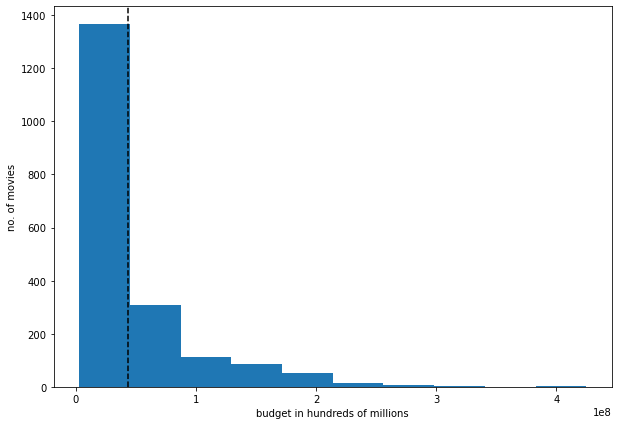

In [31]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(filtered_df['production_budget'])
plt.xlabel('budget in hundreds of millions')
plt.ylabel('no. of movies')
plt.axvline(filtered_df['production_budget'].mean(), color='k', linestyle='dashed');

In [32]:
#It looks like most of these films have budgets near or under $50 million, so that means that 
# maybe the whole $100+ million budget thing isn't quite as common as I saw on Google, so 
# let's proceed with the filtered_df. Now the next thing is to convert the date column from
# strings with text months to datetime:
from datetime import datetime
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])
#filtered_df['release_date'].dt.strptime()('%b')

<ipython-input-32-0bd6e4eaaabb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])


In [33]:
filtered_df['release_date'] = pd.DatetimeIndex(filtered_df['release_date']).month

<ipython-input-33-f1fea1dbbcd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_date'] = pd.DatetimeIndex(filtered_df['release_date']).month


In [34]:
filtered_df.rename(columns = {'release_date': 'release_month'}, inplace = True)
filtered_df

C:\Users\joelm\anaconda3again\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,release_month,title,production_budget,ROI,genres,director
0,12,Avatar,425000000,2351345279,Horror,Atsushi Wada
1,5,Pirates of the Caribbean: On Stranger Tides,410600000,635063875,"Action,Adventure,Fantasy",Rob Marshall
2,6,Dark Phoenix,350000000,-200237650,"Action,Adventure,Sci-Fi",Simon Kinberg
3,5,Avengers: Age of Ultron,330600000,1072413963,"Action,Adventure,Sci-Fi",Joss Whedon
4,4,Avengers: Infinity War,300000000,1748134200,"Action,Adventure,Sci-Fi",Anthony Russo
...,...,...,...,...,...,...
1944,12,Christmas Mail,2500000,-2500000,"Comedy,Drama,Family",John Murlowski
1945,7,Stung,2500000,-2500000,"Action,Adventure,Comedy",Benni Diez
1946,10,8 Days,2500000,-2500000,"Drama,Thriller",Jaco Booyens
1947,9,Antibirth,2500000,-2500000,Horror,Danny Perez


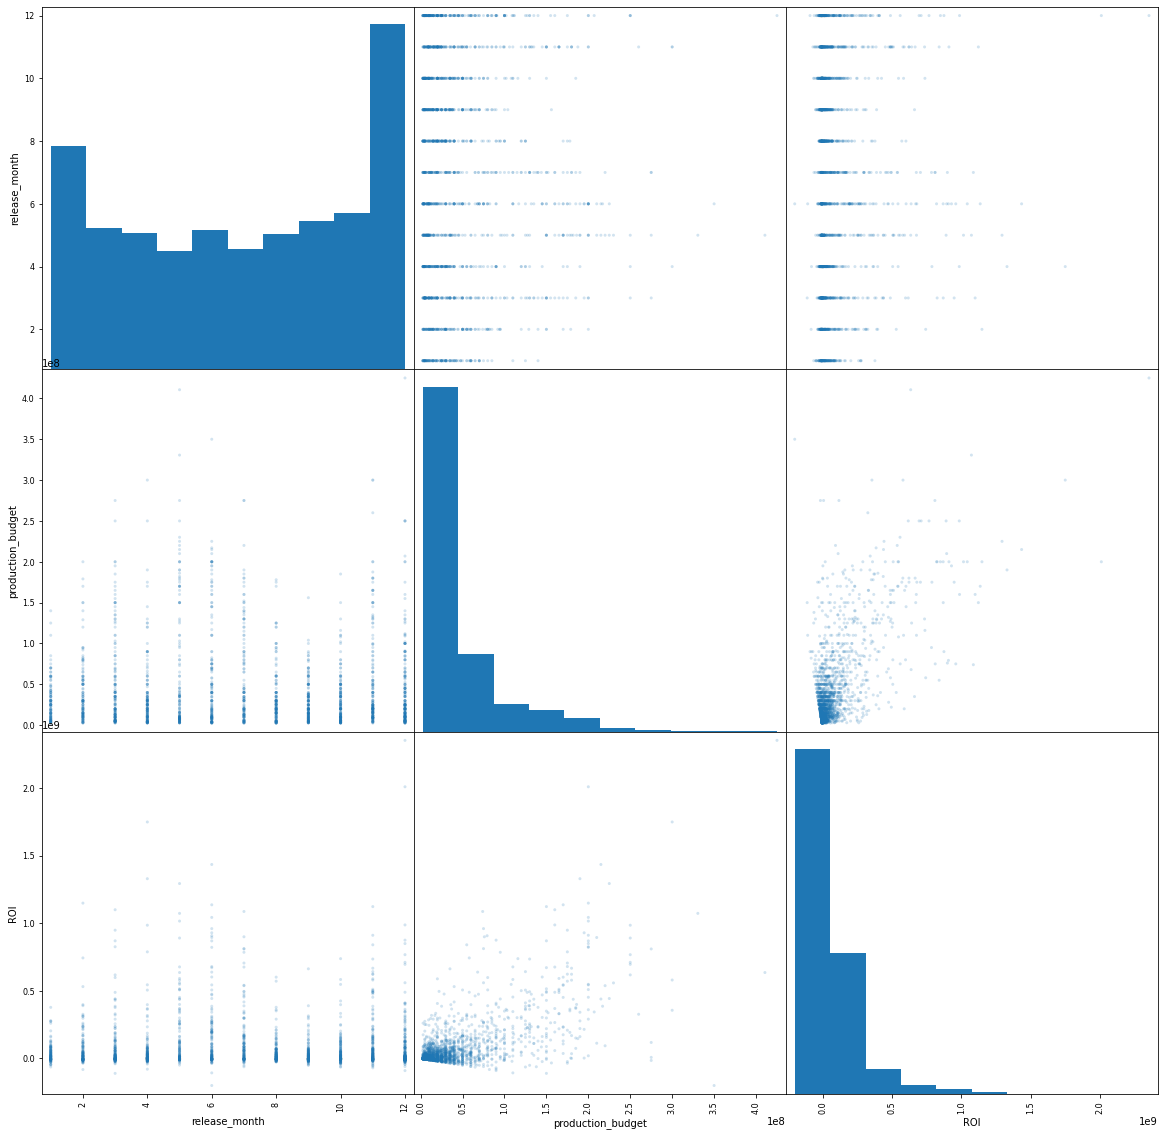

In [35]:
pd.plotting.scatter_matrix(filtered_df, alpha=0.2, figsize=(20,20));

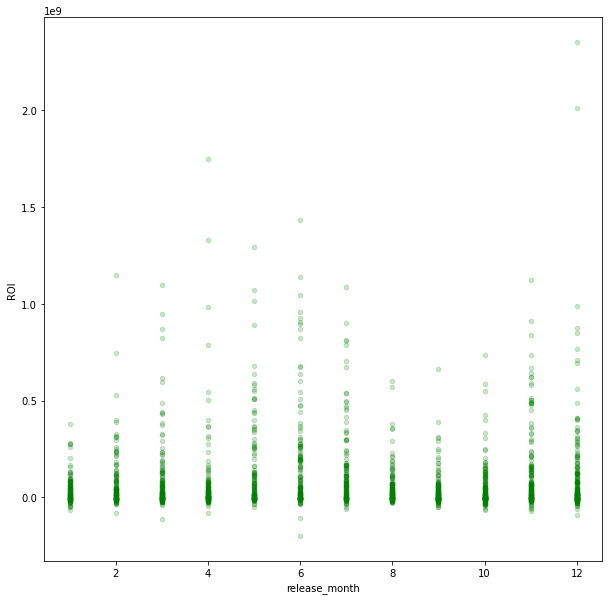

In [36]:
filtered_df.plot.scatter(x='release_month', y='ROI', c='g', alpha=0.2, figsize=(10,10));

In [37]:
#How dense are each of these months release-wise?
filtered_df['release_month'].value_counts()

12    220
11    184
10    183
9     174
3     165
6     163
4     160
8     159
7     141
5     139
2     135
1     126
Name: release_month, dtype: int64

In [200]:
#It looks like the higher ROIs tend to be earned in November-December and April-July.
# The November-December part isn't too surpising since more movies are released then
# than any other months (although it's interesting that October is one release behind 
# and yet one of the lower-ROI-earning months). It's also noteworthy how April-July
# are in the middle of the pack as far as amount of releases go, yet still seem
# to be higher ROI-earners. I guess this lends credence to the "summer blockbusters"
# saying (although April-May aren't really summer months and then there's a steep
# drop-off in August). 

#Let's see if I can get numbers on average-ROI-per-month to back this up with some 
# more specifics. I have to think this one out, I want to take the total ROI of each 
# month's movies and divide it by the number of releases that month. 

avg_monthly_ROI = filtered_df.groupby('release_month').mean().sort_values('release_month').reset_index()
#Now I need to convert those months as integers into month names for my visualization:
#avg_monthly_ROI['release_month'].dt.strptime(month_number, "%m")
#avg_monthly_ROI['release_month'].to_datetime(unit='m')
#pd.to_datetime(avg_monthly_ROI['release_month'], unit='%b')
#This is taking too long, let's map a dictionary onto it:
month_mapping = {
    1: "Jan.",
    2: "Feb.",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "Aug.",
    9: "Sept.",
    10: "Oct.",
    11: "Nov.",
    12: "Dec."
}

In [202]:
avg_monthly_ROI['release_month'] = avg_monthly_ROI['release_month'].map(month_mapping)

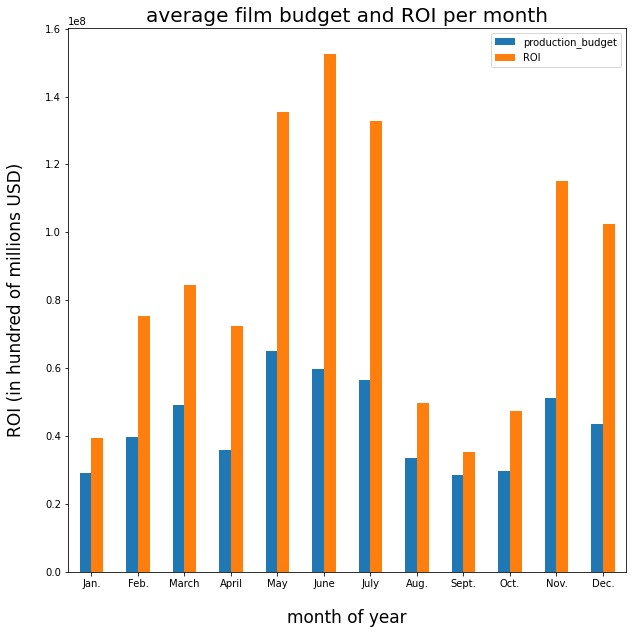

In [212]:
avg_monthly_ROI.plot(x='release_month', kind='bar', figsize=(10,10))
plt.title('average film budget and ROI per month', fontsize=20)
plt.xlabel('month of year', labelpad=20, fontsize=17)
plt.ylabel('ROI (in hundred of millions USD)', labelpad=20, fontsize=17)
plt.xticks(rotation = 0);

In [40]:
#This shows how even though April stood out a bit on the green scatter plot above, it
# doesn't have quite the same overall ROI-earnings that May-July have. 

#In any case, this is a good start and maybe I'll polish it later in Seaborn or something. 
# It also begs further questions; simply releasing a movie in June doesn't guarantee a 
# robust ROI. Why exactly do these May-July movies tend to be more successful ROI-wise? This sounds 
# like a good time to get back into the whole genre debacle as well as writers & directors.

# Let's tackle genre first: back where we left it, we realized there are
# 294 unique genre descriptions. That's WAY too many to expect a corporate executive to 
# care about, so we definitely need to condense them, but how?

#Let's get a refresher on how they break down:
print(df['genres'].value_counts().to_string())

Drama                              196
Documentary                         98
Comedy                              83
Comedy,Drama                        73
Adventure,Animation,Comedy          68
Comedy,Drama,Romance                66
Drama,Romance                       60
Action,Adventure,Sci-Fi             57
Horror                              50
Action,Crime,Drama                  48
Comedy,Romance                      45
Drama,Thriller                      41
Action,Adventure,Fantasy            40
Horror,Thriller                     39
Horror,Mystery,Thriller             36
Action,Comedy,Crime                 33
Thriller                            32
Action,Adventure,Comedy             31
Action,Adventure,Drama              31
Crime,Drama,Thriller                28
Action,Crime,Thriller               25
Biography,Drama,History             24
Crime,Drama                         23
Action,Thriller                     22
Biography,Comedy,Drama              20
Biography,Drama          

In [41]:
#That's a lot of genres. On one hand, I don't want to condense them too broadly and essentially 
# lose data, but on the other hand, it's still over ten times the amount of genres anyone
# needs. Maybe we should condense multi-labelled genres down to their first label. Before that,
# let's see how accurate these labels are:
#filtered_df.loc[filtered_df['genres'].str.contains('Action', regex=True)]
#filtered_df.loc[filtered_df['genres'].str.contains('Animation', regex=True)]
filtered_df.loc[filtered_df['genres'].str.contains('Documentary', regex=True)]

,release_month,title,production_budget,ROI,genres,director
199,6,The Patriot,110000000,105300000,Documentary,Daniel Sivan
214,5,Gladiator,103000000,354683805,"Documentary,Thriller",Laura Clarke
226,11,End of Days,100000000,112026975,"Comedy,Documentary,Drama",Christoffer Dreyer
258,7,Contact,90000000,75900000,"Documentary,History",Bentley Dean
292,2,Jumper,82500000,140140812,"Biography,Documentary,Drama",Phil Giordano
...,...,...,...,...,...,...
1929,4,"Fat, Sick & Nearly Dead",2600000,-2600000,Documentary,Kurt Engfehr
1931,7,Kevin Hart: Let Me Explain,2500000,29827255,"Comedy,Documentary",Leslie Small
1939,11,Fuel,2500000,-2325745,"Documentary,Sport",Maarten Wijsman
1940,6,8: The Mormon Proposition,2500000,-2399720,Documentary,Steven Greenstreet


In [42]:
#Ok, some movies that share titles with popular films like 'The Patriot' and 'Gladiator' being
# labeled documentaries threw me for a loop, but now I see they're just less popular than the
# Melo Gibson/Russell Crowe films they share the name with. So, let's condense genres this way.

#Splitting up the genre strings:
filtered_df['genres'].str.split(',', expand=True)

,0,1,2
0,Horror,None,None
1,Action,Adventure,Fantasy
2,Action,Adventure,Sci-Fi
3,Action,Adventure,Sci-Fi
4,Action,Adventure,Sci-Fi
...,...,...,...
1944,Comedy,Drama,Family
1945,Action,Adventure,Comedy
1946,Drama,Thriller,None
1947,Horror,None,None


In [43]:
#Ok that worked, then I googled how to just get the first one:
filtered_df['genres'] = filtered_df['genres'].str.split(',', expand=True)[0]
filtered_df

<ipython-input-43-e2662f225cba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genres'] = filtered_df['genres'].str.split(',', expand=True)[0]


,release_month,title,production_budget,ROI,genres,director
0,12,Avatar,425000000,2351345279,Horror,Atsushi Wada
1,5,Pirates of the Caribbean: On Stranger Tides,410600000,635063875,Action,Rob Marshall
2,6,Dark Phoenix,350000000,-200237650,Action,Simon Kinberg
3,5,Avengers: Age of Ultron,330600000,1072413963,Action,Joss Whedon
4,4,Avengers: Infinity War,300000000,1748134200,Action,Anthony Russo
...,...,...,...,...,...,...
1944,12,Christmas Mail,2500000,-2500000,Comedy,John Murlowski
1945,7,Stung,2500000,-2500000,Action,Benni Diez
1946,10,8 Days,2500000,-2500000,Drama,Jaco Booyens
1947,9,Antibirth,2500000,-2500000,Horror,Danny Perez


In [44]:
#Ok, that worked, now let's see how these condensed genre labels look:
filtered_df['genres'].value_counts()

Action         523
Drama          389
Comedy         336
Adventure      188
Biography      138
Crime          103
Horror          99
Documentary     91
Thriller        22
Animation       20
Fantasy          7
Sci-Fi           7
Mystery          5
Musical          5
Family           4
Music            4
War              3
Romance          3
Sport            2
Name: genres, dtype: int64

In [45]:
len(filtered_df['genres'].value_counts())

19

In [46]:
#19 is a vast improvement over 294, but maybe still just a few too many. Let's see if we can 
# tidy them up just a bit more. For example, what's the difference between 'music' and 'musical'?
filtered_df.loc[filtered_df['genres'] == 'Musical']

,release_month,title,production_budget,ROI,genres,director
239,3,Cinderella,95000000,439551353,Musical,Brad Dalton
1093,9,The Covenant,20000000,18164784,Musical,Robert Muren
1208,10,My Fair Lady,17000000,55071636,Musical,Razvan Dinca
1694,7,Standing Ovation,5600000,-5068194,Musical,Stewart Raffill
1922,2,Cinderella,2900000,260691415,Musical,Brad Dalton


In [47]:
filtered_df.loc[filtered_df['genres'] == 'Music']

,release_month,title,production_budget,ROI,genres,director
907,12,The Magic Flute,27000000,-27000000,Music,Michael Gieleta
1059,10,School of Rock,20000000,111944672,Music,John Batemen
1193,9,Metallica Through the Never,18000000,-8917094,Music,Nimród Antal
1499,12,The House of Mirth,10000000,-4850869,Music,David Sudmalis


In [216]:
#Well, I had to look a couple up, but I suppose those do seem correctly labelled. Let's
# see how they'll look in a graph:
average_genre_ROI = filtered_df.groupby('genres').mean().sort_values('ROI', ascending=False).reset_index()
average_genre_ROI

,genres,release_month,production_budget,ROI
0,Adventure,7,75730761,188797095
1,Animation,9,52675000,158214897
2,Musical,6,28100000,153682199
3,Action,7,74318189,145259903
4,Mystery,5,39800000,123657278
5,War,5,52000000,91974226
6,Sci-Fi,6,38142857,85494944
7,Horror,7,21612121,79303233
8,Documentary,7,25813187,47374097
9,Comedy,7,24858780,46506939


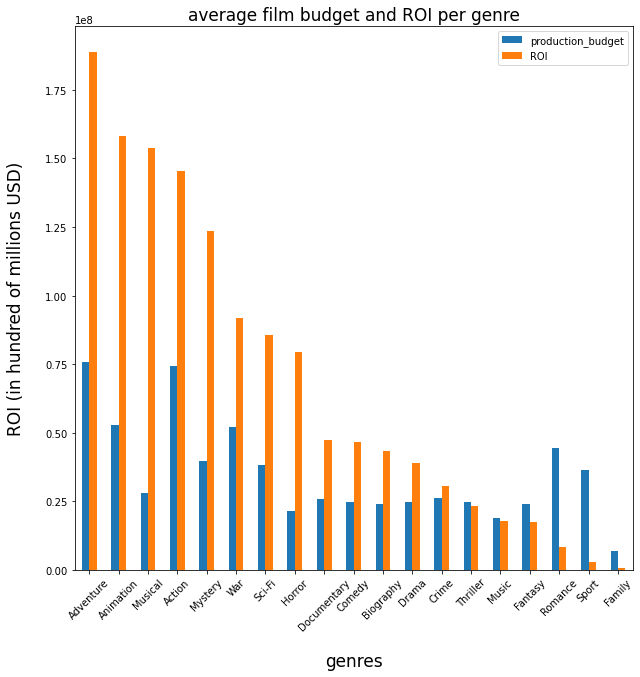

In [228]:
average_genre_ROI.plot.bar(x='genres', y=['production_budget', 'ROI'], figsize=(10,10))
plt.title('average film budget and ROI per genre', fontsize=17)
plt.ylabel('ROI (in hundred of millions USD)', labelpad=20, fontsize=17)
plt.xlabel('genres', labelpad=20, fontsize=17)
plt.xticks(rotation = 45);

In [50]:
#Hmm, we see some of these genres with only a handful of entries showing up in an important part of the 
# chart; musicals are looking similarly profitable to adventure, animation, and action movies and that
# may not necessarily be the case since there are only five of them vs. 188 adventure or 523 (!) action
# films. Nonetheless, we'll leave them here for now since we'll probably focus on more
# popular genres anyway.

In [51]:
#Let's start down that road by considering genres and their average release month:
average_genre_month = filtered_df.groupby('genres').mean().sort_values('ROI', ascending=False)

In [52]:
average_genre_month

,release_month,production_budget,ROI
genres,,,
Adventure,7,75730761,188797095
Animation,9,52675000,158214897
Musical,6,28100000,153682199
Action,7,74318189,145259903
Mystery,5,39800000,123657278
War,5,52000000,91974226
Sci-Fi,6,38142857,85494944
Horror,7,21612121,79303233
Documentary,7,25813187,47374097


In [54]:
#Ok, it looks like most genres tend to be released between May and July, which I suppose
# isn't surprising, since that's when they tend to do well. I guess I've just verified 
# something we already knew (aka the summer blockbuster season). 

#Nonetheless, I can now back up the following: if you want a positive ROI, make one of the 
# films in the top 13 of the above df (so, Adventure through Crime) and release it in
# that corresponding month, but that doesn't seem all that insightful.

#Maybe one thing I could do is pick the top three statistically significant genres
# (adventure, animation, and action) and break them down by release month and corresponding 
# ROI because right now all I really have is the AVERAGE month a genre's released in, not 
# necessarily the most profitable. 

#Thinking this through, I would start by singling out, say, the Adventure column and then 
# looking at ROI per month. First, let's just isolate Adventure movies: 
adventure_movies = filtered_df.loc[filtered_df['genres'] == 'Adventure']
adventure_movies

,release_month,title,production_budget,ROI,genres,director
11,11,Tangled,260000000,326477240,Adventure,Byron Howard
14,12,The Hobbit: An Unexpected Journey,250000000,767003568,Adventure,Peter Jackson
15,12,The Hobbit: The Desolation of Smaug,250000000,710366855,Adventure,Peter Jackson
16,12,The Hobbit: The Battle of the Five Armies,250000000,695577621,Adventure,Peter Jackson
30,12,Titanic,200000000,2008208395,Adventure,Pete Meads
...,...,...,...,...,...,...
1855,9,American Honey,3500000,-888250,Adventure,Andrea Arnold
1887,6,Swiss Army Man,3000000,2837111,Adventure,Daniel Scheinert
1913,7,Alice in Wonderland,3000000,-3000000,Adventure,Tim Burton
1935,6,Hunt for the Wilderpeople,2500000,21345533,Adventure,Taika Waititi


In [55]:
#Ok, now let's break them all down by average ROI per release month:
#adventure_ROI_by_month = adventure_movies.groupby('release_month').mean().sort_values('ROI', ascending=False)

#Huh, I had to reset_index because it was aggregating based on release_month and making that the
# index, which in turn prohibited me from doing this, but I finally got it:
adventure_ROI_by_month = adventure_movies.groupby('release_month')['ROI'].mean().reset_index()
adventure_ROI_by_month

,release_month,ROI
0,1,45671999
1,2,66463181
2,3,138189452
3,4,75843204
4,5,152598014
5,6,341637636
6,7,282424912
7,8,69735768
8,9,46769048
9,10,93098039


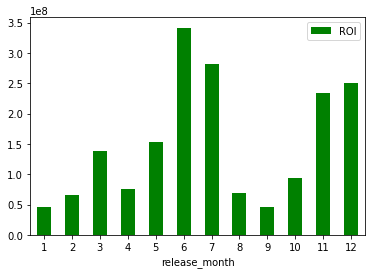

In [57]:
adventure_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='g')
plt.xticks(rotation = 0);

In [60]:
#Ok, NOW I can say if you want to make an adventure film, release it in June or July, but you 
# can also consider a November-December release. Now let's do the same for animation:
animation_movies = filtered_df.loc[filtered_df['genres'] == 'Animation']
animation_ROI_by_month = animation_movies.groupby('release_month')['ROI'].mean().reset_index()
animation_ROI_by_month

,release_month,ROI
0,1,3414530
1,3,222831065
2,4,787854547
3,5,228648063
4,7,474464573
5,8,4949562
6,9,341503055
7,10,42150788
8,11,77177766
9,12,91295746


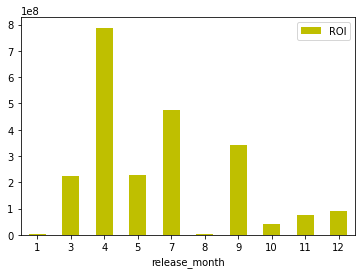

In [63]:
animation_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='y')
plt.xticks(rotation = 0);

In [62]:
#It looks like April is the more profitable month for animated movies. Now for action films:
action_movies = filtered_df.loc[filtered_df['genres'] == 'Action']
action_ROI_by_month = action_movies.groupby('release_month')['ROI'].mean().reset_index()
action_ROI_by_month

,release_month,ROI
0,1,56562754
1,2,125324557
2,3,133105481
3,4,212136118
4,5,290180152
5,6,241965774
6,7,170075488
7,8,81279670
8,9,53260824
9,10,82527306


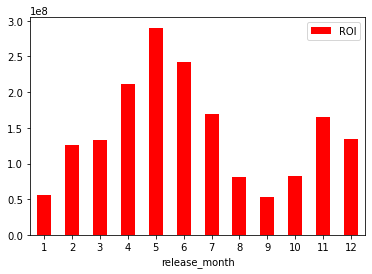

In [64]:
action_ROI_by_month.plot(x='release_month', y='ROI', kind='bar', color='r')
plt.xticks(rotation = 0);

In [78]:
#It looks like April-July are the most profitable months to release an action film with May 
# in the lead.

#Ok, so that's finished. ≡(▔﹏▔)≡ Let's see who's directing these high-ROI films. I suppose the
# question is whether to take a broad approach and see who directs these profitable films overall
# or to break it down by genre. Let's start with a big picture just to see. Specifically, let's
# look at the average ROI each director has made:

#directors_by_ROI = filtered_df.groupby('director').mean().sort_values('ROI', ascending=False)

directors_by_ROI = filtered_df.groupby('director')['ROI'].mean().reset_index().sort_values('ROI', ascending=False)
print('number of directors in this list:', len(directors_by_ROI))
print('\n')
print(directors_by_ROI.head(100).to_string())

number of directors in this list: 1432


                 director        ROI
98           Atsushi Wada 2351345279
1009           Pete Meads 2008208395
227       Colin Trevorrow 1433854864
1151         Ryan Coogler 1148258224
3              Adam Green 1122469910
81          Anthony Russo 1060868501
737            Kyle Balda 1023031962
519             James Wan  871205858
210       Christophe Gans  843815419
1414        Yarrow Cheney  811750534
669           Joss Whedon  784645092
760           Lee Unkrich  745943812
1165           Sam Mendes  745073952
1312           Tim Miller  743025593
1017        Peter Jackson  724316015
94       Artie Mandelberg  679235992
627           Jon Favreau  679035628
994         Patty Jenkins  671133378
68        Andy Muschietti  662457969
305           David Slade  638102828
166          Byron Howard  597953428
217     Christopher Nolan  584045121
38         Alfonso Cuarón  583698673
1107     Robert Stromberg  578536735
857           Michael Bay  5659995

In [165]:
#I don't really know directors all that well, so I Googled some of these folks and they are in fact
# directors (but sometimes also producers) of successful films, so this looks legitimate. However, 
# this is a list of 1,432 directors, so let's break 'em down. I think my project is largely veering
# down a genre-oriented path, so let's regroup them by genre. Thinking through this, I specifically
# want to see, say, the top ROI directors per genre, so genre --> directors --> top 10 ROI-earners.

#directors_by_genre = filtered_df.groupby(['genres', 'director']).size()
#directors_by_genre = filtered_df.groupby(['genres', 'director', 'ROI']).size()
directors_by_genre = filtered_df.groupby(['genres', 'director']).agg({'ROI': sum})
directors_by_genre

ROI
genres   director                       
Action   Adam McKay             70936470
         Akiva Schaffer         12130045
         Alan Taylor           494602516
         Albert Hughes          78750817
         Alejandro G. Iñárritu 397938302
...                                  ...
Thriller Vladimir V. Feyer      31931658
         Youssef Delara         -3000000
War      Adam Starks            -9800895
         Jared Chandler        140023573
         Lan An                145700000

[1655 rows x 1 columns]

In [167]:
#directors_by_genre.sort_values(by='ROI', ascending=False)
directors_by_genre = directors_by_genre.sort_values(['genres','ROI'], ascending=[True,False])

In [168]:
print(directors_by_genre.to_string())

                                                    ROI
genres      director                                   
Action      Anthony Russo                    3182605502
            Joss Whedon                      2353935276
            James Wan                        2315617434
            Michael Bay                      2263998250
            Francis Lawrence                 1942381826
            Christopher Nolan                1834801109
            Sam Mendes                       1490147904
            Zack Snyder                      1470920114
            Gareth Edwards                   1469178925
            Colin Trevorrow                  1433854864
            Dean DeBlois                     1189715545
            Ryan Coogler                     1148258224
            J.A. Bayona                      1135772799
            Shane Black                      1096476582
            Brad Bird                        1079148229
            Marc Webb                        104